### Face completion

You get the left half of a face image. Predict the right one.

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces().images

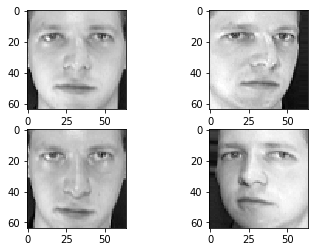

In [3]:
#Yet another matplotlib feature - subplot - creates a grid-like structure of plots
#Syntax: plt.subplot(width,height,index) with index starting from 1.
plt.subplot(2,2,1)
plt.imshow(data[0],cmap='gray')
plt.subplot(2,2,2)
plt.imshow(data[1],cmap='gray')
plt.subplot(2,2,3)
plt.imshow(data[2],cmap='gray')
plt.subplot(2,2,4)
plt.imshow(data[3],cmap='gray')

# X,y

We now must slice the data into known part "X" and unknown part "y". Since data is just a numpy array, you can slice it with multi-dimensional slices.

The dimensions are (image_index, height, width).

* `data[:10]` - first 10 images
* `data[:, :10]` - 10-pixel stripe at the top of each image.
* `data[10:20, :, :10]` - take images 10-19 and slice __horizontally__ a stripe of width 10 pixels

Let's now use that to slice our data.


In [4]:
X=data[:,:, :data.shape[2]/2]
y=data[:,:, data.shape[2]/2:]
data.shape

(400, 64, 64)

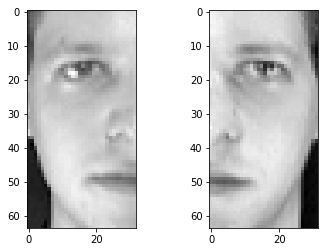

In [5]:
#If you did everything right, you should see two half-faces composing a face
plt.subplot(1,2,1)
plt.imshow(X[0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(y[0],cmap='gray')


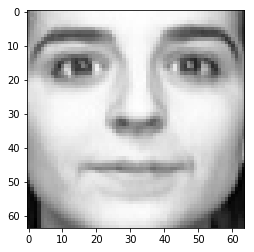

In [6]:
def glue(left_half,right_half):
    #melt two half-faces back into a face
    left_half = left_half.reshape([-1,64,32])
    right_half = right_half.reshape([-1,64,32])
    return np.concatenate([left_half,right_half],axis=-1)


plt.imshow(glue(X,y)[99],cmap='gray')

# Linear Regression

Now let's get through the usual pipeline: split data between train and test; fit linear regression

In [8]:
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X.reshape([len(X),-1]),
                                                 y.reshape([len(y),-1]),
                                                 test_size=0.05,random_state=42)
print("X_train.shape=",X_train.shape)
print("X_test.shape=",X_test.shape)


X_train.shape= (380, 2048)
X_test.shape= (20, 2048)


In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(Y_train,model.predict(X_train)))
print(mean_squared_error(Y_test,model.predict(X_test)))

3.09197138558e-12
0.0102840175389


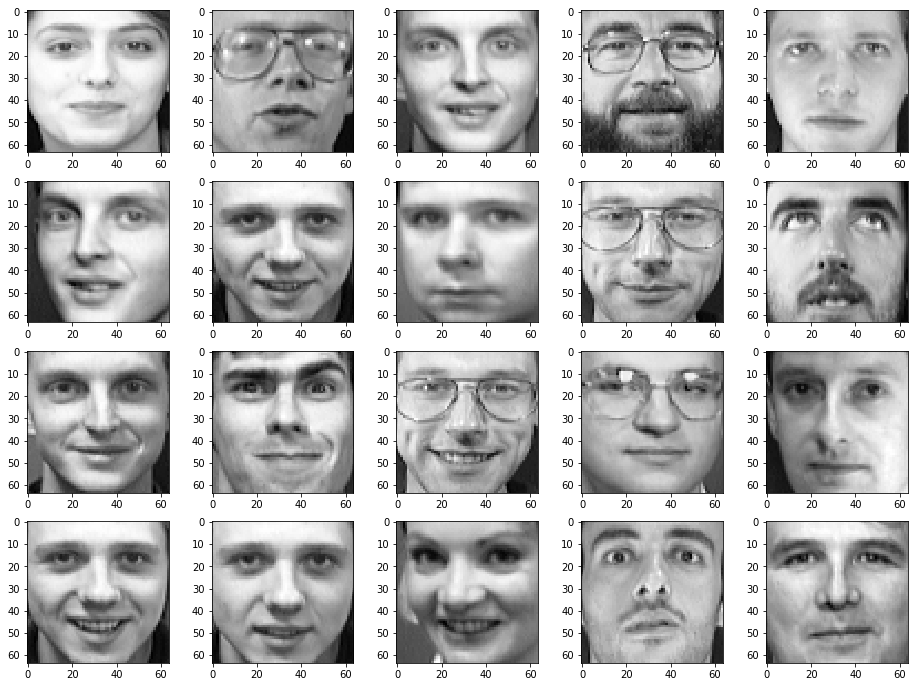

In [12]:
#Images restored on the training settrain

predictions = model.predict(X_train)

pics = glue(X_train,predictions)
plt.figure(figsize=[16,12])
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(pics[i],cmap='gray')

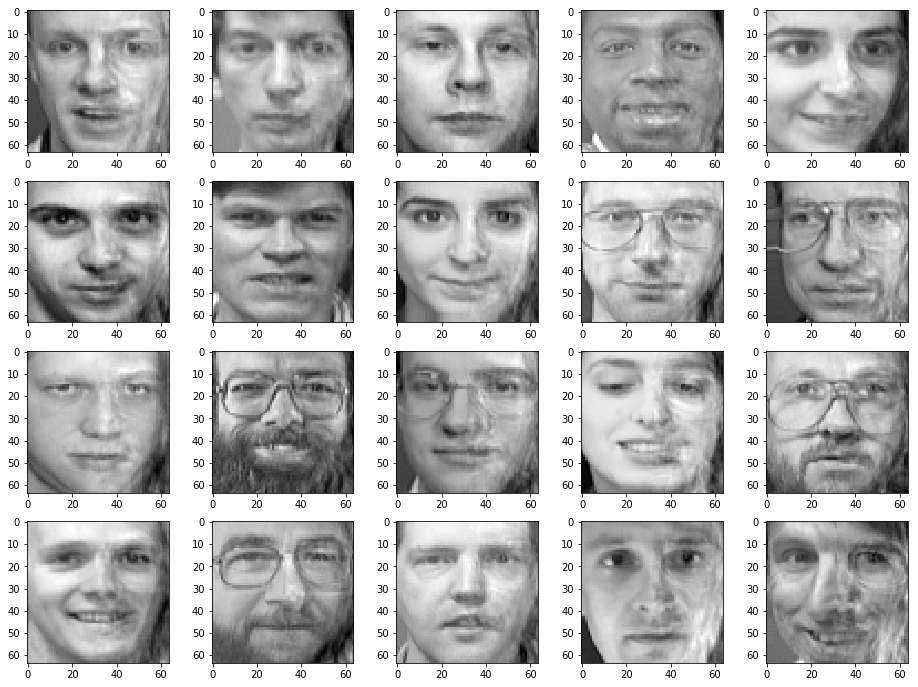

In [13]:
#Images from test restored
predictions = model.predict(X_test)

pics = glue(X_test,predictions)
plt.figure(figsize=[16,12])
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(pics[i],cmap='gray')

# Ridge regression

Ridge regression is a simple linear regression with L2 penalty: $ argmin \space L + \alpha \cdot \sum_i W_i^2 $


In [14]:
from sklearn.linear_model import Ridge

#Example syntax: Ridge(alpha=0.5), just like LinearRegression
model_r = Ridge(alpha=0.01)
model_r.fit(X_train,Y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [15]:
print(mean_squared_error(Y_train,model_r.predict(X_train)))
print(mean_squared_error(Y_test,model_r.predict(X_test)))

8.28606081633e-07
0.0101372500015


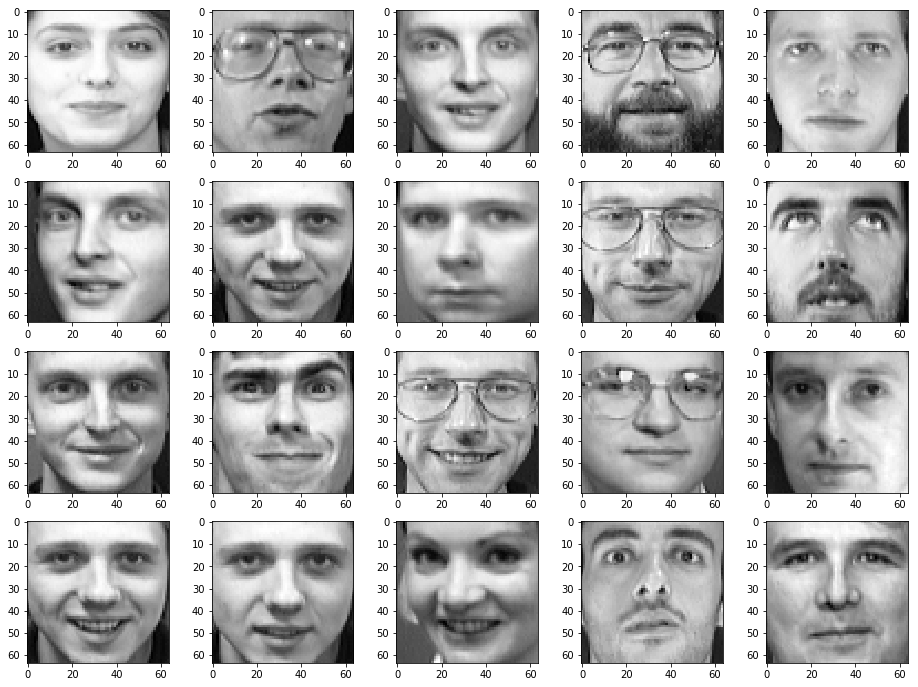

In [18]:
#Images from test restored
predictions = model_r.predict(X_train)

pics = glue(X_train,predictions)
plt.figure(figsize=[16,12])
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(pics[i],cmap='gray')

# Bonus: Grid search

Find alpha that minimizes test error. You can do so by enumerating all alphas in a reasonable diapason using loops.

In [19]:
def ridge_alpha(x):
    model_r = Ridge(alpha=x)
    model_r.fit(X_train,Y_train)
    return mean_squared_error(Y_test,model_r.predict(X_test))

In [35]:
x0_base = np.arange(-4.,4.)
x0 = 10**x0_base
mse = [ ridge_alpha(x) for x in x0 ]
arg = np.argmin(mse)
for x in np.column_stack((x0, mse)):
    print("alpha = {}, mse = {}".format(x[0],x[1]))
print("\nMin: alpha = {}, mse = {}".format(x0[arg], mse[arg]))

alpha = 0.0001, mse = 0.010279588038
alpha = 0.001, mse = 0.0102658580763
alpha = 0.01, mse = 0.0101372500015
alpha = 0.1, mse = 0.00930904228287
alpha = 1.0, mse = 0.00751321811344
alpha = 10.0, mse = 0.0074274746756
alpha = 100.0, mse = 0.0101362068698
alpha = 1000.0, mse = 0.0149766748782

Min: alpha = 10.0, mse = 0.0074274746756
